In [1]:
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy.stats as sts

In [3]:
ride_data_to_load= "ride_data.csv"
city_data_to_load= "city_data.csv"
os.getcwd()

'/Users/halleh/Desktop/Resources/PyBer_Analysis/PyBer_Analysis/PyBer_Analysis'

In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df = pd.read_csv(city_data_to_load)
city_data_df


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [5]:
#part1)1
pyber_data_df = pd.merge(ride_data_df, city_data_df, how ="left", on=["city", "city"])
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [6]:
sum_of_drivers= city_data_df.groupby(["type"]).sum()['driver_count'] 
sum_of_rides=pyber_data_df.groupby(["type"]).count()['ride_id'] 
sum_of_fares=pyber_data_df.groupby(["type"]).sum()['fare']
sum_of_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#part 1)2,3,4
summery_df = pd.DataFrame({
    'Total_Drivers':sum_of_drivers,
    'Total_Rides':sum_of_rides,
    'Total_Fares':sum_of_fares
})
del summery_df.index.name
summery_df['Average_Fare_per_Ride']= (summery_df.Total_Fares/summery_df.Total_Rides).map('${:,.2f}'.format)
summery_df['Average_Fare_per_Driver']= (summery_df.Total_Fares/summery_df.Total_Drivers).map('${:,.2f}'.format)
summery_df

,Total_Drivers,Total_Rides,Total_Fares,Average_Fare_per_Ride,Average_Fare_per_Driver
Rural,78,125,4327.93,$34.62,$55.49
Suburban,490,625,19356.33,$30.97,$39.50
Urban,2405,1625,39854.38,$24.53,$16.57


In [8]:
Dataframe=(pyber_data_df.rename(columns={'city': 'City',
                                'date':'Date', 
                                'fare':'Fare',
                                'ride_id': 'Ride Id',
                                'driver_count': 'No. Drivers', 
                                'type':'City Type'
                               })
)
Dataframe=Dataframe.set_index(["Date"])
Fare_Dataframe=Dataframe.drop(labels=['City', 'Ride Id', 'No. Drivers'], axis=1)
Fare_Dataframe_copy=Fare_Dataframe.copy()
Fare_Dataframe_copy.index=pd.to_datetime(Fare_Dataframe_copy.index)
Fare_Dataframe_copy.index
Fare_Dataframe_copy.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [9]:
Fare_Dataframe_copy=Fare_Dataframe_copy.reset_index()
Fare_Dataframe_copy['Date']=Fare_Dataframe_copy['Date'].dt.date
sum_of_Fares= Fare_Dataframe_copy.groupby(["City Type","Date"]).sum()['Fare']
sum_of_Fares

City Type  Date      
Rural      2019-01-01     43.69
           2019-01-02     52.12
           2019-01-03     19.90
           2019-01-04     24.88
           2019-01-06     47.33
                          ...  
Urban      2019-05-04    323.57
           2019-05-05    322.10
           2019-05-06    181.20
           2019-05-07    258.01
           2019-05-08    170.82
Name: Fare, Length: 334, dtype: float64

In [10]:
sum_of_Fares_df=pd.DataFrame(sum_of_Fares)
sum_of_Fares_df

Fare
City Type Date              
Rural     2019-01-01   43.69
          2019-01-02   52.12
          2019-01-03   19.90
          2019-01-04   24.88
          2019-01-06   47.33
...                      ...
Urban     2019-05-04  323.57
          2019-05-05  322.10
          2019-05-06  181.20
          2019-05-07  258.01
          2019-05-08  170.82

[334 rows x 1 columns]

In [11]:
sum_of_Fares_df=sum_of_Fares.reset_index()
sum_of_Fares_df

,City Type,Date,Fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33
...,...,...,...
329,Urban,2019-05-04,323.57
330,Urban,2019-05-05,322.10
331,Urban,2019-05-06,181.20
332,Urban,2019-05-07,258.01


In [12]:
pivot_df=sum_of_Fares_df.pivot(index='Date', columns='City Type')['Fare']
pivot_df



City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [13]:
#loc_df =pivot_df.loc[pd.date_range('2019-01-01','2019-04-28')]
pyber_df=pivot_df.loc['2019-01-01':'2019-04-28']
pyber_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-24,NaN,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98


In [14]:
pyber_df.resample('W').sum()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [15]:
weekly_df=pyber_df.resample('W').sum()

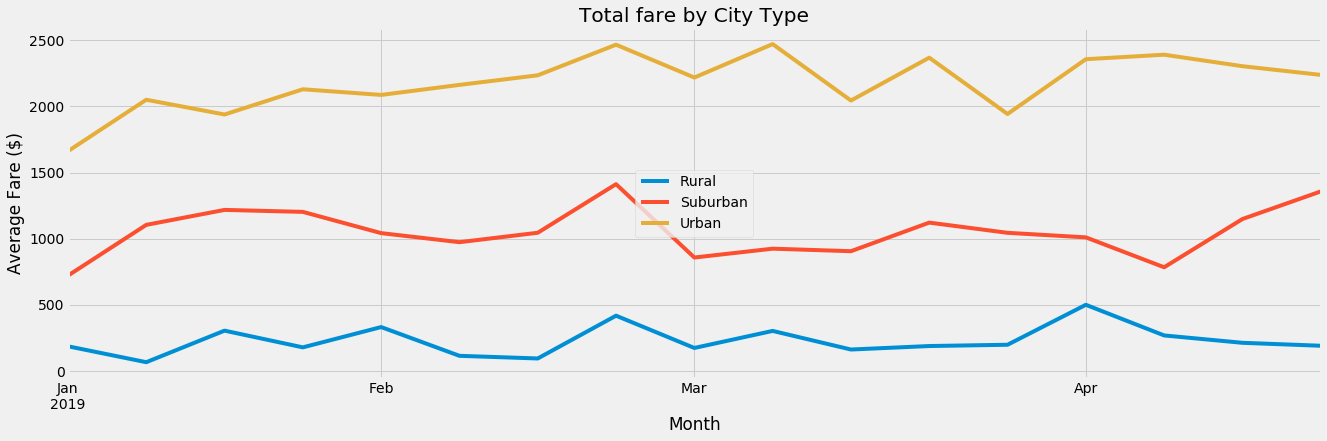

In [16]:
import datetime
plt.style.use('fivethirtyeight')
ax = weekly_df.plot(figsize=(20,6))
ax.set_title("Total fare by City Type")
ax.set_ylabel("Average Fare ($)")
ax.set_xlabel("Month")
ax.grid(True)
ax.legend(loc='best')
# ax.set_ylim(0,2500)
plt.show()


